## Lead Scoring Case Study

#### Date : 03-March-2019
#### Team member
- #### Snehal Bhosle
- #### Swathi Kommana
- #### Yatin Kanchan
- #### Tapan Apte

With 37 predictor variables we need to predict whether a particular customer will be converted to lead or no lead.

### Step 1: Importing the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# the commonly used alias for seaborn is sns
import seaborn as sns
from datetime import datetime
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
leads.rename(index=str, columns={'Prospect ID': 'Prospect_ID', 
                              'Lead Number': 'Lead_Num',
                              'Lead Origin' : 'Lead_Origin',
                             'Lead Source' : 'Lead_Source',
                             'Do Not Email' : 'DNE',
                             'Do Not Call' : 'DNC',
                             'Total Time Spent on Website' : 'Tot_Time_Website',
                             'Page Views Per Visit' : 'Page_Views_per_Visit',
                             'Last Activity' : 'Last_Activity',
                             'How did you hear about X Education' : 'How_did_you_know',
                             'What is your current occupation' : 'Current_Occup',
                             'What matters most to you in choosing a course' : 'Matters_Most',
                             'Newspaper Article' : 'Newspaper_Article',
                             'X Education Forums' : 'Forums',
                             'Digital Advertisement' : 'Dig_Advt',
                             'Through Recommendations' : 'Thru_Recomm',
                             'Receive More Updates About Our Courses' : 'Rec_more_Updates_course',
                             'Lead Quality' : 'Lead_Quality',
                             'Update me on Supply Chain Content' : 'Update_on_SupplyChain',
                             'Get updates on DM Content' : 'Update_on_DM',
                             'Lead Profile' : 'Lead_Profile',
                             'Asymmetrique Activity Index' : 'Asymm_Activity_Idx',
                             'Asymmetrique Profile Index' : 'Asymm_Profile_Idx',
                             'Asymmetrique Activity Score' : 'Asymm_Activity_Score',
                             'Asymmetrique Profile Score' : 'Asymm_Profile_Score',
                             'I agree to pay the amount through cheque' : 'Agree_Pay_by_Chq',
                             'A free copy of Mastering The Interview' : 'Free_copy_Intvw',
                             'Last Notable Activity' : 'Last_Notable_Activity'
                             }, inplace=True)

### Step 2: Inspecting the Dataframe

In [6]:
leads.duplicated().sum()

0

In [7]:
leads.columns

Index(['Prospect_ID', 'Lead_Num', 'Lead_Origin', 'Lead_Source', 'DNE', 'DNC',
       'Converted', 'TotalVisits', 'Tot_Time_Website', 'Page_Views_per_Visit',
       'Last_Activity', 'Country', 'Specialization', 'How_did_you_know',
       'Current_Occup', 'Matters_Most', 'Search', 'Magazine',
       'Newspaper_Article', 'Forums', 'Newspaper', 'Dig_Advt', 'Thru_Recomm',
       'Rec_more_Updates_course', 'Tags', 'Lead_Quality',
       'Update_on_SupplyChain', 'Update_on_DM', 'Lead_Profile', 'City',
       'Asymm_Activity_Idx', 'Asymm_Profile_Idx', 'Asymm_Activity_Score',
       'Asymm_Profile_Score', 'Agree_Pay_by_Chq', 'Free_copy_Intvw',
       'Last_Notable_Activity'],
      dtype='object')

In [8]:
# Prospect Id column is redundant, hence can be dropped
leads = leads.drop(['Prospect_ID'], axis=1)

In [9]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead_Num                    0.00
Lead_Origin                 0.00
Lead_Source                 0.39
DNE                         0.00
DNC                         0.00
Converted                   0.00
TotalVisits                 1.48
Tot_Time_Website            0.00
Page_Views_per_Visit        1.48
Last_Activity               1.11
Country                    26.63
Specialization             15.56
How_did_you_know           23.89
Current_Occup              29.11
Matters_Most               29.32
Search                      0.00
Magazine                    0.00
Newspaper_Article           0.00
Forums                      0.00
Newspaper                   0.00
Dig_Advt                    0.00
Thru_Recomm                 0.00
Rec_more_Updates_course     0.00
Tags                       36.29
Lead_Quality               51.59
Update_on_SupplyChain       0.00
Update_on_DM                0.00
Lead_Profile               29.32
City                       15.37
Asymm_Activity_Idx         45.65
Asymm_Prof

In [10]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [11]:
def plot_percentages(dataframe, var_list, sortbyindex=False):
# Plot the percentage of car's in the US market with respect to different car features
    plt.figure(figsize=(20, 17))
    for var in var_list:
        plt.subplot(4,4,var_list.index(var)+1)
        values = (dataframe[var].value_counts(normalize=True)*100)
        if sortbyindex:
                values = values.sort_index()
        ax = values.plot.bar(color=sns.color_palette('deep', 16))
        ax.set_ylabel('% in dataset', fontsize=16)
        ax.set_xlabel(var, fontsize=10)
        showLabels(ax)

### Lets Observe the distribution of Caategorical Variables

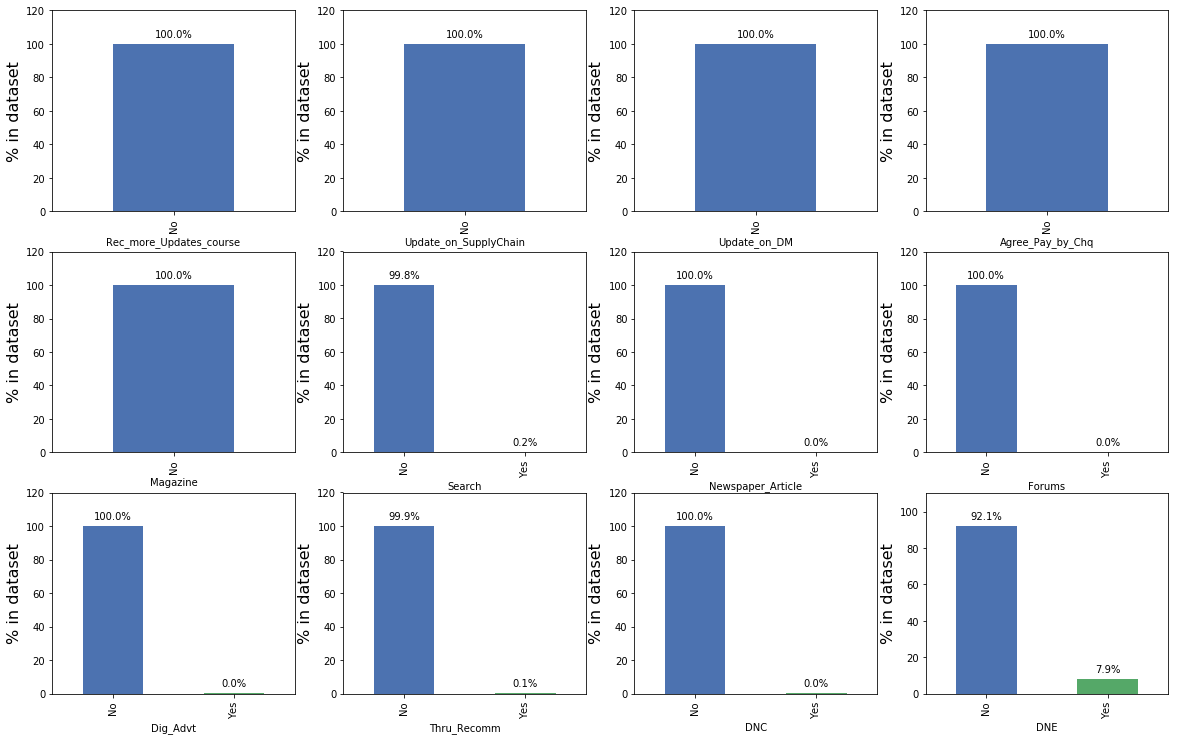

In [12]:
categorical_variables = ['Rec_more_Updates_course','Update_on_SupplyChain','Update_on_DM','Agree_Pay_by_Chq','Magazine','Search','Newspaper_Article','Forums','Dig_Advt','Thru_Recomm','DNC','DNE']
plot_percentages(leads,categorical_variables)

In [13]:
print (str(leads['Rec_more_Updates_course'].astype('category').value_counts()))
print (str(leads['Update_on_SupplyChain'].astype('category').value_counts()))
print (str(leads['Update_on_DM'].astype('category').value_counts()))
print (str(leads['Agree_Pay_by_Chq'].astype('category').value_counts()))
print (str(leads['Magazine'].astype('category').value_counts()))
print (str(leads['Search'].astype('category').value_counts()))
print (str(leads['Newspaper_Article'].astype('category').value_counts()))
print (str(leads['Forums'].astype('category').value_counts()))
print (str(leads['Dig_Advt'].astype('category').value_counts()))
print (str(leads['Thru_Recomm'].astype('category').value_counts()))
print (str(leads['Rec_more_Updates_course'].astype('category').value_counts()))
print (str(leads['DNC'].astype('category').value_counts()))

No    9240
Name: Rec_more_Updates_course, dtype: int64
No    9240
Name: Update_on_SupplyChain, dtype: int64
No    9240
Name: Update_on_DM, dtype: int64
No    9240
Name: Agree_Pay_by_Chq, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9238
Yes       2
Name: Newspaper_Article, dtype: int64
No     9239
Yes       1
Name: Forums, dtype: int64
No     9236
Yes       4
Name: Dig_Advt, dtype: int64
No     9233
Yes       7
Name: Thru_Recomm, dtype: int64
No    9240
Name: Rec_more_Updates_course, dtype: int64
No     9238
Yes       2
Name: DNC, dtype: int64


#### Looking at the column data above, it is okay to drop those columns as it has less than 0.5% distinct value

In [14]:
leads = leads.drop(['Rec_more_Updates_course', 'Update_on_SupplyChain','Update_on_DM',
                    'Magazine','Agree_Pay_by_Chq', 'DNC',
                   'Search','Newspaper_Article','Newspaper','Forums','Dig_Advt','Thru_Recomm','Rec_more_Updates_course'], axis=1)

In [15]:
# Find all columns that has 'Select' as a value in it.

for i in leads.columns:
    if (leads[i].dtypes == 'object'):            
        newDf = leads.loc[leads[i]=='Select']
        if(not newDf.empty):
            print(i)

Specialization
How_did_you_know
Lead_Profile
City


In [16]:
# Check the Count of Records with each of the columns having Select values
print ('Select count Lead_Profile: ' + str(len(leads.loc[(leads['Lead_Profile']=='Select')])))
print ('Select count How_did_you_know: ' + str(len(leads.loc[(leads['How_did_you_know']=='Select')])))
print ('Select count City: ' + str(len(leads.loc[(leads['City']=='Select')])))
print ('Select count Specialization: ' + str(len(leads.loc[leads['Specialization']=='Select'])))

Select count Lead_Profile: 4146
Select count How_did_you_know: 5043
Select count City: 2249
Select count Specialization: 1942


In [17]:
# Check the Conversion ratio when Country as null
leads[leads['Country'].isnull()].groupby(['Converted'])['Lead_Num'].count()

Converted
0    1385
1    1076
Name: Lead_Num, dtype: int64

In [18]:
# Check the Conversion ratio when Country is not null
leads[~leads['Country'].isnull()].groupby(['Converted'])['Lead_Num'].count()

Converted
0    4294
1    2485
Name: Lead_Num, dtype: int64

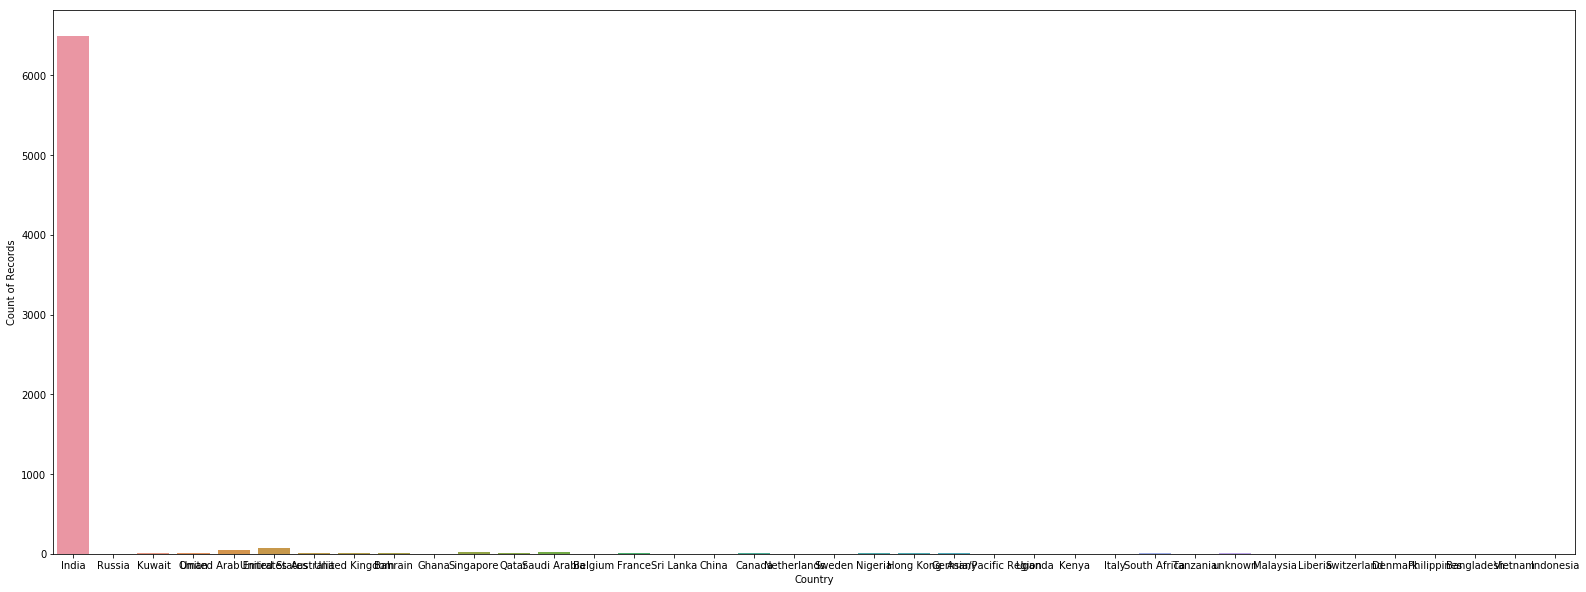

In [19]:
# Plots for Country Column

# Defining figure size and initializing subplots
plt.subplots(figsize=(60,10))

# Plot for number of loans given in each grade.
plt.subplot(1,2,1)
ax = sns.countplot(x='Country', data=leads)
ax.set(xlabel = 'Country', ylabel = 'Count of Records')

plt.show()

In [20]:
# It is safe to impute Null countries with India 
leads.at[leads.loc[leads.Country.isnull()].index,'Country']= 'India'

### Step 3: Data Preparation

In [21]:
# Replace 'Select' with Null Values.
leads.at[leads.loc[leads.Lead_Profile=='Select'].index,'Lead_Profile']= np.nan
leads.at[leads.loc[leads.How_did_you_know=='Select'].index,'How_did_you_know']= np.nan
leads.at[leads.loc[leads.Specialization=='Select'].index,'Specialization']= np.nan
leads.at[leads.loc[leads.City=='Select'].index,'City']= np.nan

In [22]:
# ReCheck the Count of Records with each of the columns having Select values after treatment
print ('Select count Lead_Profile: ' + str(len(leads.loc[(leads['Lead_Profile']=='Select')])))
print ('Select count How_did_you_know: ' + str(len(leads.loc[(leads['How_did_you_know']=='Select')])))
print ('Select count City: ' + str(len(leads.loc[(leads['City']=='Select')])))
print ('Select count Specialization: ' + str(len(leads.loc[leads['Specialization']=='Select'])))

Select count Lead_Profile: 0
Select count How_did_you_know: 0
Select count City: 0
Select count Specialization: 0


In [23]:
leads.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                36
DNE                         0
Converted                   0
TotalVisits               137
Tot_Time_Website            0
Page_Views_per_Visit      137
Last_Activity             103
Country                     0
Specialization           3380
How_did_you_know         7250
Current_Occup            2690
Matters_Most             2709
Tags                     3353
Lead_Quality             4767
Lead_Profile             6855
City                     3669
Asymm_Activity_Idx       4218
Asymm_Profile_Idx        4218
Asymm_Activity_Score     4218
Asymm_Profile_Score      4218
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

In [24]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead_Num                  0.00
Lead_Origin               0.00
Lead_Source               0.39
DNE                       0.00
Converted                 0.00
TotalVisits               1.48
Tot_Time_Website          0.00
Page_Views_per_Visit      1.48
Last_Activity             1.11
Country                   0.00
Specialization           36.58
How_did_you_know         78.46
Current_Occup            29.11
Matters_Most             29.32
Tags                     36.29
Lead_Quality             51.59
Lead_Profile             74.19
City                     39.71
Asymm_Activity_Idx       45.65
Asymm_Profile_Idx        45.65
Asymm_Activity_Score     45.65
Asymm_Profile_Score      45.65
Free_copy_Intvw           0.00
Last_Notable_Activity     0.00
dtype: float64

In [25]:
# Looks like City has been randomly entered and does not really ties to Country.
# Considering Cities has more Null Columns, we can go ahead and drop the city column
leads = leads.drop(['City'], axis=1)

In [26]:
# Last Activity and Last Notable activity seems to have close value.
# Hence we can drop Last Activity Column
leads = leads.drop(['Last_Activity'], axis=1)

In [27]:
# Looks like we can safely drop 'Lead Profile' column and bank on 'Lead Quality' 

leads = leads.drop(['Lead_Profile', 'Page_Views_per_Visit', 'Matters_Most', 'Lead_Quality', 'How_did_you_know', 'Asymm_Activity_Idx','Asymm_Profile_Idx','Asymm_Activity_Score','Asymm_Profile_Score',], axis=1)

In [28]:
leads.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                36
DNE                         0
Converted                   0
TotalVisits               137
Tot_Time_Website            0
Country                     0
Specialization           3380
Current_Occup            2690
Tags                     3353
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

### Outlier Treatment

In [29]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
    return df_out

In [30]:
leads = remove_outlier(leads, 'TotalVisits')

In [31]:
leads.shape

(8836, 13)

In [32]:
leads.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                29
DNE                         0
Converted                   0
TotalVisits                 0
Tot_Time_Website            0
Country                     0
Specialization           3263
Current_Occup            2621
Tags                     3251
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

In [33]:
# Drop Rows with more than 5 columns having null values
leads1 = leads[(leads.isnull().sum(axis=1)<=5)]
leads1.shape

(8836, 13)

In [34]:
leads1.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                29
DNE                         0
Converted                   0
TotalVisits                 0
Tot_Time_Website            0
Country                     0
Specialization           3263
Current_Occup            2621
Tags                     3251
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

In [35]:
leads1 = leads1[~leads1['Tags'].isnull()]

In [36]:
leads1.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                23
DNE                         0
Converted                   0
TotalVisits                 0
Tot_Time_Website            0
Country                     0
Specialization           1373
Current_Occup              77
Tags                        0
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

In [37]:
leads1.shape

(5585, 13)

In [38]:
leads1.isnull().sum()

Lead_Num                    0
Lead_Origin                 0
Lead_Source                23
DNE                         0
Converted                   0
TotalVisits                 0
Tot_Time_Website            0
Country                     0
Specialization           1373
Current_Occup              77
Tags                        0
Free_copy_Intvw             0
Last_Notable_Activity       0
dtype: int64

In [39]:
leads1.at[leads1.loc[leads1.Lead_Source.isnull()].index,'Lead_Source']=leads1.mode()['Lead_Source'][0]
leads1.at[leads1.loc[leads1.Current_Occup.isnull()].index,'Current_Occup']=leads1.mode()['Current_Occup'][0]
leads1.at[leads1.loc[leads1.Specialization.isnull()].index,'Specialization']=leads1.mode()['Specialization'][0]

In [40]:
leads1.isnull().sum()

Lead_Num                 0
Lead_Origin              0
Lead_Source              0
DNE                      0
Converted                0
TotalVisits              0
Tot_Time_Website         0
Country                  0
Specialization           0
Current_Occup            0
Tags                     0
Free_copy_Intvw          0
Last_Notable_Activity    0
dtype: int64

In [41]:
leads1.shape


(5585, 13)

In [42]:
leads1.groupby(['Converted'])['Lead_Num'].count()

Converted
0    3043
1    2542
Name: Lead_Num, dtype: int64

### Segmentation For Categorical Variables

##### Segmenting Lead_Source

In [43]:
lead_source_dict = {
    'Google':'SearchEngine',
    'google' : 'SearchEngine',
    'bing' : 'SearchEngine',
    'Direct Traffic' : 'DirectTraffic',
    'Olark Chat' : 'OlarkChat',
    'Organic Search' : 'OrganicSearch',
    'Reference' : 'Reference',
    'Facebook' : 'Facebook',
    'Click2call':'Others',
    'Press_Release':'Others',
    'Social Media':'Others',
    'Live Chat' : 'Others',
    'Pay per Click Ads':'Others',
    'welearnblog_Home' : 'Others',
    'NC_EDM' : 'Others',
    'WeLearn':'Others',
    'blog' : 'Others',
    'testone':'Others',
    'youtubechannel' : 'Others',    
    'Welingak Website': 'ReferralSites',
    'Referral Sites' : 'ReferralSites'
}
leads1['Lead_Source']=leads1['Lead_Source'].map(lead_source_dict)

##### Segmenting Tags

In [44]:
Tags_dict = {
    'Will revert after reading the email' : 'RevertAfterReadingEmail',
    'Ringing' : 'NA',
'Already a student' : 'AlreadyStudent',
    'Interested in other courses':'OtherCourseInterest',
'Closed by Horizzon': 'ClosebyHorizon',
'switched off' : 'NA',
'Busy' : 'NA',
'Not doing further education': 'NoFurtherEducation',
'Lost to EINS': 'Lost',
'Interested  in full time MBA' : 'OtherCourseInterest',
'Graduation in progress':'Graduating',
'invalid number' : 'NA',
'Diploma holder (Not Eligible)' : 'DiplomaHolder',
'wrong number given' : 'NA',
'opp hangup' : 'NA',
'number not provided' : 'NA',
'Lost to Others' : 'Lost',
'in touch with EINS' : 'Lost',
'Want to take admission but has financial problems' : 'FinanceProb',
'Still Thinking' : 'Thinking',
'Interested in Next batch': 'NextBatch',
'In confusion whether part time or DLP':'Confused',
    'Shall take in the next coming month' : 'NextBatch',
'University not recognized' : 'Others',
'Recognition issue (DEC approval)' : 'Others'
}

leads1['Tags']=leads1['Tags'].map(Tags_dict)

In [45]:
leads1['Lead_Source'].astype('category').value_counts()

SearchEngine     1839
DirectTraffic    1761
OrganicSearch     736
OlarkChat         681
Reference         434
ReferralSites     101
Facebook           22
Others             11
Name: Lead_Source, dtype: int64

In [46]:
leads1['Lead_Origin'].astype('category').value_counts()

Landing Page Submission    3356
API                        1713
Lead Add Form               494
Lead Import                  22
Name: Lead_Origin, dtype: int64

##### Segmenting Country

In [47]:
leads1['Country'] = leads1['Country'].apply(lambda x: 'Others' if x != 'India' else 'India')
leads1['Country'].astype('category').value_counts()

India     5399
Others     186
Name: Country, dtype: int64

In [48]:
leads1['Specialization'].astype('category').value_counts()

Finance Management                   2080
Marketing Management                  634
Human Resource Management             619
Operations Management                 365
Business Administration               286
Supply Chain Management               255
IT Projects Management                254
Banking, Investment And Insurance     245
Media and Advertising                 146
Travel and Tourism                    128
International Business                124
Healthcare Management                 114
Hospitality Management                 82
Retail Management                      72
E-COMMERCE                             71
Rural and Agribusiness                 51
E-Business                             38
Services Excellence                    21
Name: Specialization, dtype: int64

In [49]:
leads1['Last_Notable_Activity'].astype('category').value_counts()

Modified                        1842
Email Opened                    1755
SMS Sent                        1580
Page Visited on Website          154
Email Link Clicked                97
Olark Chat Conversation           53
Email Bounced                     34
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          11
Email Marked Spam                  2
View in browser link Clicked       1
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Name: Last_Notable_Activity, dtype: int64

##### Segmenting Last_Notable_Activity

In [50]:
Notable_dict = {
    'Modified'  : 'Modified',
    'Email Opened' : 'EmailOpened',
    'SMS Sent' : 'SMSSent',
    'Page Visited on Website' : 'PageVisited',
    'Email Link Clicked' : 'EmailLinkClicked',
    'Olark Chat Conversation' : 'Conversation',
    'Email Bounced' : 'Unreachable',
    'Unreachable' : 'Unreachable',
    'Unsubscribed' : 'Others',
    'Had a Phone Conversation' : 'Conversation',
    'Email Marked Spam' : 'Others',
    'View in browser link Clicked' : 'Others',
    'Resubscribed to emails'  : 'Others',
    'Email Received' : 'Conversation',
    'Approached upfront' : 'Conversation'
}

leads1['Last_Notable_Activity']=leads1['Last_Notable_Activity'].map(Notable_dict)

In [51]:
leads1['Last_Notable_Activity'].astype('category').value_counts()

Modified            1842
EmailOpened         1755
SMSSent             1580
PageVisited          154
EmailLinkClicked      97
Conversation          66
Unreachable           56
Others                35
Name: Last_Notable_Activity, dtype: int64

In [52]:
leads1['DNE'].astype('category').value_counts()

No     5215
Yes     370
Name: DNE, dtype: int64

In [53]:
leads1['Current_Occup'].astype('category').value_counts()

Unemployed              4718
Working Professional     649
Student                  191
Other                     13
Housewife                  9
Businessman                5
Name: Current_Occup, dtype: int64

### Checking for the unique values for all the columns

In [54]:
for col in leads1.columns:
    print(col, leads1[col].unique(),sep=" --->",end="\n\n")

Lead_Num --->[660737 660728 660727 ... 579546 579545 579533]

Lead_Origin --->['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']

Lead_Source --->['OlarkChat' 'OrganicSearch' 'DirectTraffic' 'SearchEngine'
 'ReferralSites' 'Reference' 'Facebook' 'Others']

DNE --->['No' 'Yes']

Converted --->[0 1]

TotalVisits --->[ 0.  5.  2.  1.  8. 11.  6.  3.  4.  7.  9. 10.]

Tot_Time_Website --->[   0  674 1532 ...  927 1944 1845]

Country --->['India' 'Others']

Specialization --->['Finance Management' 'Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'Travel and Tourism'
 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'IT Projects Management'
 'Rural and Agribusiness' 'Healthcare Management' 'E-Business']

Current_Occup --->['Unemployed' 'Student' 'Working Professional' 'Businessman' 'O

#### Converting Categorical Variables to Numeric

In [55]:
leads1['DNE'] = leads1['DNE'].map({'No':0,'Yes':1})
leads1['Free_copy_Intvw'] = leads1['Free_copy_Intvw'].map({'No':0,'Yes':1})

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)
#### Creating a dummy variable for some of the categorical variables and dropping the first one.

In [56]:
dummy1 = pd.get_dummies(leads1[['Lead_Origin', 'Lead_Source', 'Country', 'Specialization','Current_Occup','Tags', 'Last_Notable_Activity' ]], drop_first=True)

# Adding the results to the master dataframe
leads_with_dummy = pd.concat([leads1, dummy1], axis=1)

#### Dropping the repeated variables

In [57]:
leads_with_dummy = leads_with_dummy.drop(['Lead_Origin', 'Lead_Source', 'Country', 'Specialization','Current_Occup','Tags', 'Last_Notable_Activity' ], axis=1)

In [58]:
leads_with_dummy.columns

Index(['Lead_Num', 'DNE', 'Converted', 'TotalVisits', 'Tot_Time_Website',
       'Free_copy_Intvw', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Add Form', 'Lead_Origin_Lead Import',
       'Lead_Source_Facebook', 'Lead_Source_OlarkChat',
       'Lead_Source_OrganicSearch', 'Lead_Source_Others',
       'Lead_Source_Reference', 'Lead_Source_ReferralSites',
       'Lead_Source_SearchEngine', 'Country_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Managem

In [59]:
leads_with_dummy.head()

,Lead_Num,DNE,Converted,TotalVisits,Tot_Time_Website,Free_copy_Intvw,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,...,Tags_Others,Tags_RevertAfterReadingEmail,Tags_Thinking,Last_Notable_Activity_EmailLinkClicked,Last_Notable_Activity_EmailOpened,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_PageVisited,Last_Notable_Activity_SMSSent,Last_Notable_Activity_Unreachable
0,660737,0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,0,5.0,674,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,0,1,2.0,1532,1,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,660719,0,0,1.0,305,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,660681,0,1,2.0,1428,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [60]:
leads_with_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5585 entries, 0 to 9239
Data columns (total 59 columns):
Lead_Num                                    5585 non-null int64
DNE                                         5585 non-null int64
Converted                                   5585 non-null int64
TotalVisits                                 5585 non-null float64
Tot_Time_Website                            5585 non-null int64
Free_copy_Intvw                             5585 non-null int64
Lead_Origin_Landing Page Submission         5585 non-null uint8
Lead_Origin_Lead Add Form                   5585 non-null uint8
Lead_Origin_Lead Import                     5585 non-null uint8
Lead_Source_Facebook                        5585 non-null uint8
Lead_Source_OlarkChat                       5585 non-null uint8
Lead_Source_OrganicSearch                   5585 non-null uint8
Lead_Source_Others                          5585 non-null uint8
Lead_Source_Reference                       5585 non-null uint8


In [61]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_with_dummy.Tot_Time_Website.describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    5585.000000
mean      538.588899
std       563.275437
min         0.000000
25%        48.000000
50%       291.000000
75%      1021.000000
90%      1425.600000
95%      1595.800000
99%      1850.160000
max      2272.000000
Name: Tot_Time_Website, dtype: float64

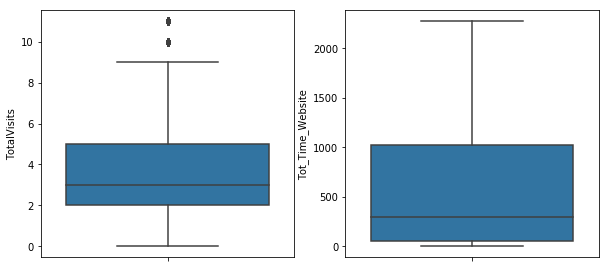

In [62]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(y = 'TotalVisits', data = leads_with_dummy)
plt.subplot(2,2,2)
sns.boxplot(y = 'Tot_Time_Website', data = leads_with_dummy)

### Step 4: Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = leads_with_dummy.drop(['Converted','Lead_Num'], axis=1)
X.head()

,DNE,TotalVisits,Tot_Time_Website,Free_copy_Intvw,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_OlarkChat,Lead_Source_OrganicSearch,...,Tags_Others,Tags_RevertAfterReadingEmail,Tags_Thinking,Last_Notable_Activity_EmailLinkClicked,Last_Notable_Activity_EmailOpened,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_PageVisited,Last_Notable_Activity_SMSSent,Last_Notable_Activity_Unreachable
0,0,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1.0,305,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [65]:
# Putting response variable to y
y = leads_with_dummy['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
X_train[['TotalVisits','Tot_Time_Website']] = scaler.fit_transform(X_train[['TotalVisits','Tot_Time_Website']])
X_train.head()

,DNE,TotalVisits,Tot_Time_Website,Free_copy_Intvw,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Facebook,Lead_Source_OlarkChat,Lead_Source_OrganicSearch,...,Tags_Others,Tags_RevertAfterReadingEmail,Tags_Thinking,Last_Notable_Activity_EmailLinkClicked,Last_Notable_Activity_EmailOpened,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_PageVisited,Last_Notable_Activity_SMSSent,Last_Notable_Activity_Unreachable
2709,0,0.301246,1.540035,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1868,0,0.301246,-0.331014,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9149,0,-0.089454,-0.876220,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8374,0,0.691947,-0.775322,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4272,0,0.691947,0.015935,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [69]:
### Checking the Converted Rate
converted = (sum(leads_with_dummy['Converted'])/len(leads_with_dummy['Converted'].index))*100
converted

45.51477170993733

#### We have almost 46% Conversion rate

### Step 6: Looking at Correlations

In [70]:
corrmat = leads_with_dummy.corr() 

In [71]:
#corrmat.to_csv('Corrmat.csv')

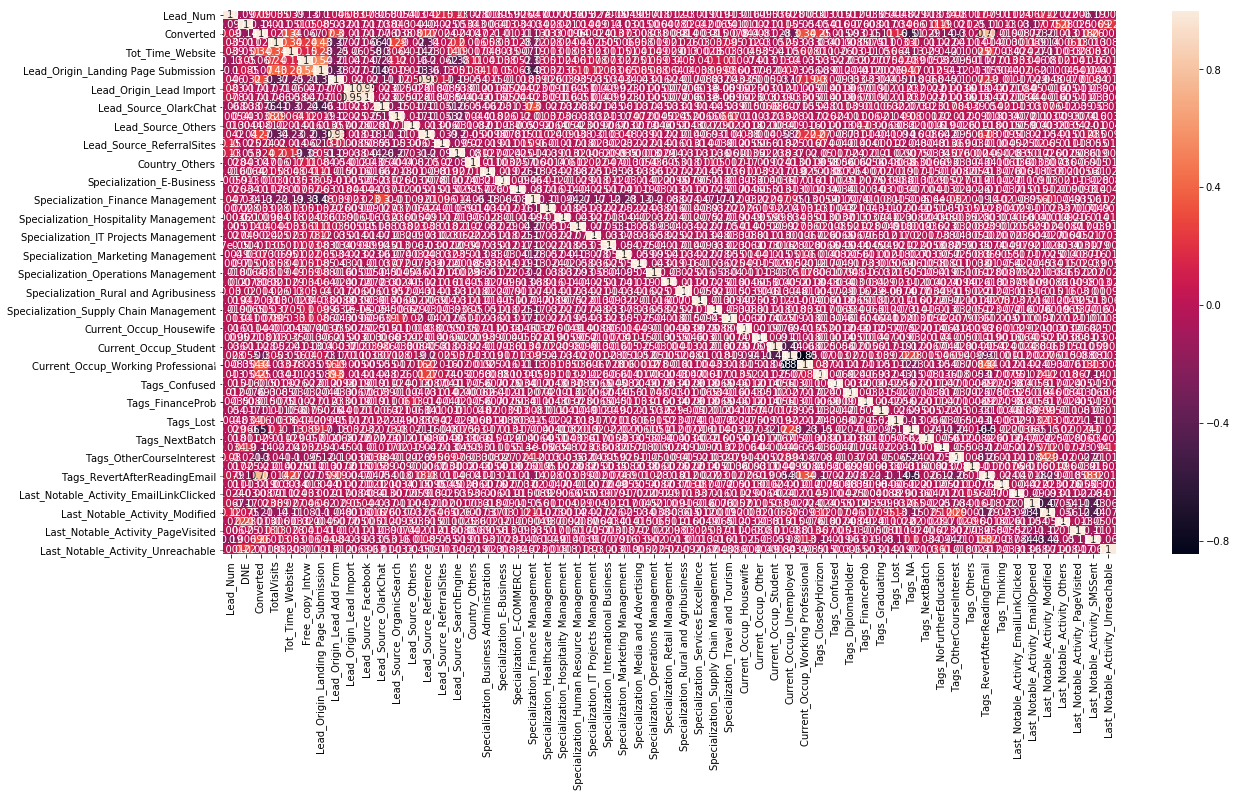

In [72]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_with_dummy.corr(),annot = True)
plt.show()

In [73]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(leads_with_dummy, 4))

Top Absolute Correlations
Lead_Origin_Lead Import    Lead_Source_Facebook                  0.954366
Lead_Origin_Lead Add Form  Lead_Source_Reference                 0.931831
Current_Occup_Unemployed   Current_Occup_Working Professional    0.845871
Converted                  Tags_RevertAfterReadingEmail          0.767046
dtype: float64


#### Dropping highly correlated dummy variables

In [74]:
X_test = X_test.drop(['Lead_Source_Facebook','Lead_Source_Reference','Current_Occup_Working Professional','Tags_RevertAfterReadingEmail','Tags_DiplomaHolder'], 1)
X_train = X_train.drop(['Lead_Source_Facebook','Lead_Source_Reference','Current_Occup_Working Professional','Tags_RevertAfterReadingEmail','Tags_DiplomaHolder'], 1)

#### Checking the Correlation Matrix

In [75]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train, 4))

Top Absolute Correlations
Free_copy_Intvw                      Lead_Origin_Landing Page Submission    0.546975
Lead_Origin_Landing Page Submission  Specialization_Finance Management      0.477004
Last_Notable_Activity_EmailOpened    Last_Notable_Activity_Modified         0.467181
Lead_Origin_Landing Page Submission  Lead_Source_OlarkChat                  0.458295
dtype: float64


### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [76]:
import statsmodels.api as sm

In [77]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3909
Model:                            GLM   Df Residuals:                     3856
Model Family:                Binomial   Df Model:                           52
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -910.45
Date:                Sun, 03 Mar 2019   Deviance:                       1820.9
Time:                        18:44:54   Pearson chi2:                 5.48e+03
No. Iterations:                    21   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.5942      0.658      2.424      0.015       0.305       2.883
DNE                                         -1.6269      0.319     -5.103      0.000      -2.252      -1.002
TotalVisits                                  0.4126      0.085      4.877      0.000       0.247       0.578
Tot_Time_Website                             1.0182      0.073     13.915      0.000       0.875       1.162
Free_copy_Intvw                             -0.2908      0.193     -1.510      0.131      -0.668       0.087
Lead_Origin_Landing Page Submission          0.0023      0.212      0.011      0.991      -0.413       0.418
Lead_Origin_Lead Add Form                    3.4356      0.385      8.912      0.000       2.680       4.191
Lead_Origin_Lead Import                      2.8944      0.970      2.985      0.003       0.994       4.795
Lead_Source_OlarkChat                        1.4825      0.293      5.054      0.000       0.908       2.057
Lead_Source_OrganicSearch                    0.5535      0.227      2.437      0.015       0.108       0.999
Lead_Source_Others                           0.5726      1.208      0.474      0.635      -1.794       2.939
Lead_Source_ReferralSites                    0.6400      0.574      1.115      0.265      -0.485       1.765
Lead_Source_SearchEngine                     0.5912      0.206      2.874      0.004       0.188       0.994
Country_Others                              -0.0754      0.339     -0.223      0.824      -0.740       0.589
Specialization_Business Administration      -0.1459      0.432     -0.337      0.736      -0.993       0.701
Specialization_E-Business                   -0.0724      0.773     -0.094      0.925      -1.587       1.443
Specialization_E-COMMERCE                   -0.2227      0.608     -0.366      0.714      -1.415       0.969
Specialization_Finance Management           -1.1027      0.348     -3.173      0.002      -1.784      -0.422
Specialization_Healthcare Management        -0.3190      0.545     -0.585      0.558      -1.387       0.749
Specialization_Hospitality Management       -1.0378      0.582     -1.783      0.075      -2.179       0.103
Specialization_Human Resource Management    -0.3248      0.373     -0.870      0.384      -1.057       0.407
Specialization_IT Projects Management       -0.3688      0.431     -0.856      0.392      -1.213       0.475
Specialization_International Business       -0.5791      0.540     -1.073      0.283      -1.637       0.479
Specialization_Marketing Management         -0.1930      0.379     -0.509      0.611      -0.936       0.550
Specialization_Media and Advertising        -0.4065      0.517     -0.786      0.432      -1.420       0.607
Specialization_Operations Management        -0.8269      0.395     -2.093      0.036      -1.601      -0.053
S

### Step 8: Feature Selection Using RFE

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [79]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 14)             # running RFE with 14 variables as output
rfe = rfe.fit(X_train, y_train)

In [80]:
rfe.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False])

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('DNE', True, 1),
 ('TotalVisits', False, 18),
 ('Tot_Time_Website', False, 3),
 ('Free_copy_Intvw', False, 19),
 ('Lead_Origin_Landing Page Submission', False, 32),
 ('Lead_Origin_Lead Add Form', True, 1),
 ('Lead_Origin_Lead Import', False, 2),
 ('Lead_Source_OlarkChat', False, 6),
 ('Lead_Source_OrganicSearch', False, 8),
 ('Lead_Source_Others', False, 37),
 ('Lead_Source_ReferralSites', False, 9),
 ('Lead_Source_SearchEngine', False, 7),
 ('Country_Others', False, 31),
 ('Specialization_Business Administration', False, 28),
 ('Specialization_E-Business', False, 27),
 ('Specialization_E-COMMERCE', False, 30),
 ('Specialization_Finance Management', False, 10),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 15),
 ('Specialization_Human Resource Management', False, 39),
 ('Specialization_IT Projects Management', False, 34),
 ('Specialization_International Business', False, 22),
 ('Specialization_Marketing Management', False, 29)

In [82]:
col = X_train.columns[rfe.support_]

In [83]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Tot_Time_Website', 'Free_copy_Intvw',
       'Lead_Origin_Landing Page Submission', 'Lead_Origin_Lead Import',
       'Lead_Source_OlarkChat', 'Lead_Source_OrganicSearch',
       'Lead_Source_Others', 'Lead_Source_ReferralSites',
       'Lead_Source_SearchEngine', 'Country_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_T

##### Assessing the model with StatsModels

In [84]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3909
Model:                            GLM   Df Residuals:                     3894
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.7
Date:                Sun, 03 Mar 2019   Deviance:                       2249.4
Time:                        18:44:56   Pearson chi2:                 5.66e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     2.1634      0.225      9.618      0.000       1.723       2.604
DNE                                      -1.4939      0.239     -6.254      0.000      -1.962      -1.026
Lead_Origin_Lead Add Form                 1.6200      0.269      6.013      0.000       1.092       2.148
Specialization_Rural and Agribusiness     1.5456      0.608      2.543      0.011       0.354       2.737
Current_Occup_Student                    -2.9132      0.313     -9.306      0.000      -3.527      -2.300
Current_Occup_Unemployed                 -1.6527      0.232     -7.126      0.000      -2.107      -1.198
Tags_ClosebyHorizon                       3.4793      0.717      4.850      0.000       2.073       4.885
Tags_FinanceProb                         -2.5849      1.234     -2.095      0.036      -5.004      -0.166
Tags_Graduating                          -3.4004      0.484     -7.030      0.000      -4.349      -2.452
Tags_Lost                                 1.5243      0.287      5.305      0.000       0.961       2.087
Tags_NA                                  -4.4063      0.179    -24.627      0.000      -4.757      -4.056
Tags_NoFurtherEducation                  -5.1561      1.036     -4.976      0.000      -7.187      -3.125
Tags_OtherCourseInterest                 -4.3796      0.320    -13.665      0.000      -5.008      -3.751
Tags_Thinking                            -2.9686      1.234     -2.407      0.016      -5.386      -0.551
Last_Notable_Activity_SMSSent             2.5135      0.170     14.793      0.000       2.181       2.847
=========================================================================================================
"""

In [85]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2709    0.953659
1868    0.019926
9149    0.624979
8374    0.019926
4272    0.953659
1361    0.019926
5314    0.624979
952     0.019926
5542    0.200679
4424    0.953659
dtype: float64

In [86]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.95365877, 0.01992621, 0.62497926, 0.01992621, 0.95365877,
       0.01992621, 0.62497926, 0.01992621, 0.2006791 , 0.95365877])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Lead_Num'] = y_train.index
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Num
0,1,0.953659,2709
1,0,0.019926,1868
2,1,0.624979,9149
3,0,0.019926,8374
4,1,0.953659,4272


##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [88]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Num,predicted
0,1,0.953659,2709,1
1,0,0.019926,1868,0
2,1,0.624979,9149,1
3,0,0.019926,8374,0
4,1,0.953659,4272,1


In [89]:
from sklearn import metrics

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1778  328]
 [ 145 1658]]


In [91]:
# Actual/Predicted     not_converted    converted
    # not_converted        1778      328
    # converted            145       1658

In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8789971859810694


#### Checking VIFs

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Current_Occup_Unemployed,2.99
9,Tags_NA,1.91
13,Last_Notable_Activity_SMSSent,1.44
11,Tags_OtherCourseInterest,1.33
1,Lead_Origin_Lead Add Form,1.22
5,Tags_ClosebyHorizon,1.21
0,DNE,1.13
10,Tags_NoFurtherEducation,1.12
8,Tags_Lost,1.10
7,Tags_Graduating,1.06


There are VIF value seems to be just perfect. Hence we do not need to drop any variable

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9195784803105934

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8442545109211775

In [98]:
# Calculate false postive rate - predicting converted when customer has actually not converted
print(FP/ float(TN+FP))

0.1557454890788224


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.8348439073514602


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9245969838793552


### Step 9: Plotting the ROC Curve

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

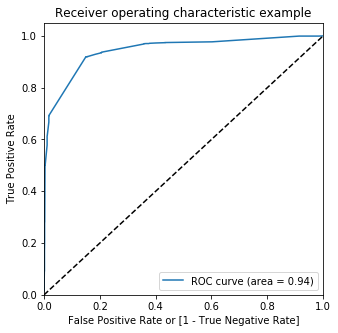

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Num,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.953659,2709,1,1,1,1,1,1,1,1,1,1,1
1,0,0.019926,1868,0,1,0,0,0,0,0,0,0,0,0
2,1,0.624979,9149,1,1,1,1,1,1,1,1,0,0,0
3,0,0.019926,8374,0,1,0,0,0,0,0,0,0,0,0
4,1,0.953659,4272,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.461243  1.000000  0.000000
0.1   0.1  0.792786  0.970050  0.641026
0.2   0.2  0.792786  0.968941  0.641975
0.3   0.3  0.868509  0.929007  0.816714
0.4   0.4  0.879509  0.920688  0.844255
0.5   0.5  0.878997  0.919578  0.844255
0.6   0.6  0.882067  0.919024  0.850427
0.7   0.7  0.846508  0.687188  0.982906
0.8   0.8  0.844206  0.682196  0.982906
0.9   0.9  0.767716  0.500277  0.996676


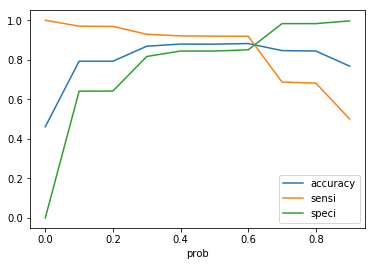

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,Converted,Convert_Prob,Lead_Num,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.953659,2709,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.019926,1868,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.624979,9149,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.019926,8374,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.953659,4272,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8820670248145306

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1791,  315],
       [ 146, 1657]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9190238491403216

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8504273504273504

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.14957264957264957


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.84026369168357


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9246257098606092


## Precision and Recall

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1778,  328],
       [ 145, 1658]], dtype=int64)

##### Precision
TP / TP + FP

In [117]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8348439073514602

##### Recall
TP / TP + FN

In [118]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9195784803105934

In [119]:
from sklearn.metrics import precision_score, recall_score

In [120]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8348439073514602

In [121]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9195784803105934

### Precision and recall tradeoff

In [122]:
from sklearn.metrics import precision_recall_curve

In [123]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       0
 4       1
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      1
 17      1
 18      0
 19      0
 20      0
 21      1
 22      0
 23      1
 24      1
 25      1
 26      1
 27      1
 28      1
 29      0
        ..
 3879    1
 3880    0
 3881    0
 3882    1
 3883    0
 3884    1
 3885    1
 3886    1
 3887    0
 3888    1
 3889    0
 3890    0
 3891    0
 3892    1
 3893    0
 3894    0
 3895    0
 3896    0
 3897    1
 3898    0
 3899    1
 3900    0
 3901    0
 3902    0
 3903    1
 3904    1
 3905    0
 3906    0
 3907    1
 3908    1
 Name: Converted, Length: 3909, dtype: int64, 0       1
 1       0
 2       1
 3       0
 4       1
 5       0
 6       1
 7       0
 8       0
 9       1
 10      1
 11      1
 12      1
 13      1
 14      0
 15      0
 16      1
 17      1
 18      1
 19      0
 20      1
 21      1
 22      0
 23      1
 24      1
 25      

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

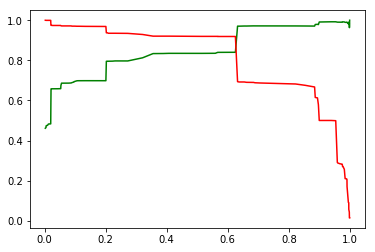

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [126]:
X_test[['TotalVisits','Tot_Time_Website']] = scaler.transform(X_test[['TotalVisits','Tot_Time_Website']])

In [127]:
X_test = X_test[col]
X_test.head()

,DNE,Lead_Origin_Lead Add Form,Specialization_Rural and Agribusiness,Current_Occup_Student,Current_Occup_Unemployed,Tags_ClosebyHorizon,Tags_FinanceProb,Tags_Graduating,Tags_Lost,Tags_NA,Tags_NoFurtherEducation,Tags_OtherCourseInterest,Tags_Thinking,Last_Notable_Activity_SMSSent
1829,0,0,0,0,1,0,0,0,0,0,0,0,0,0
344,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6834,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2341,0,0,0,0,1,0,0,0,0,0,0,0,0,1
55,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [128]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

1829    0.624979
344     0.019926
6834    0.953659
2341    0.953659
55      0.019926
6569    0.200679
7541    0.320875
6307    0.020456
4608    0.981836
3654    0.004543
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
# Let's see the head
y_pred_1.head()

,0
1829,0.624979
344,0.019926
6834,0.953659
2341,0.953659
55,0.019926


In [133]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting Lead_Num to index
y_test_df['Lead_Num'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

,Converted,Lead_Num,0
0,1,1829,0.624979
1,0,344,0.019926
2,1,6834,0.953659
3,1,2341,0.953659
4,0,55,0.019926


In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [139]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Lead_Num','Converted','Convert_Prob'], axis=1)

In [140]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead_Num,Converted,Convert_Prob
0,1829,1,0.624979
1,344,0,0.019926
2,6834,1,0.953659
3,2341,1,0.953659
4,55,0,0.019926


In [141]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.6 else 0)

In [142]:
y_pred_final.head()

,Lead_Num,Converted,Convert_Prob,final_predicted
0,1829,1,0.624979,1
1,344,0,0.019926,0
2,6834,1,0.953659,1
3,2341,1,0.953659,1
4,55,0,0.019926,0


In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8836515513126492

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[801, 136],
       [ 59, 680]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9201623815967523

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8548559231590181